In [17]:
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext
from llama_index.core import VectorStoreIndex

chroma_client = chromadb.EphemeralClient()
chroma_collection = chroma_client.create_collection("quickstart")
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [4]:
v = VectorStoreIndex(
    index_struct=VectorStoreIndex.index_struct_cls(index_id='test'),
    storage_context=storage_context,
    embed_model='skip'
)
retriever = v.as_retriever()

In [16]:

retriever._vector_store.client._client.delete_collection(retriever._vector_store.client.name)

In [19]:
retriever._vector_store._collection = chroma_collection

In [22]:
from llama_index.core.schema import MetadataMode, TextNode
retriever._vector_store.add([TextNode(text="test", embedding=[1,0,0,0])])

['1ac4550a-a88c-4226-82e3-4804cab047d0']

In [ ]:
import os
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore

for i in range(1,5):
    db_path = f'{i}_chroma'
    chroma_client = chromadb.PersistentClient(path=db_path)
    chroma_collection = chroma_client.get_or_create_collection(name='quickstart')
    vector_stores.append(ChromaVectorStore(chroma_collection=chroma_collection))

### Visualize retrieval result

Reading gpt-4o-batch-all-target_all-level_0_chroma.jsonl:   0%|          | 0.00/16.5G [00:00<?, ?B/s]

Reading gpt-4o-batch-all-target_all-level_0_chroma.jsonl: 100%|██████████| 16.5G/16.5G [04:06<00:00, 72.0MB/s]
/tmp/ipykernel_19944/2448241600.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


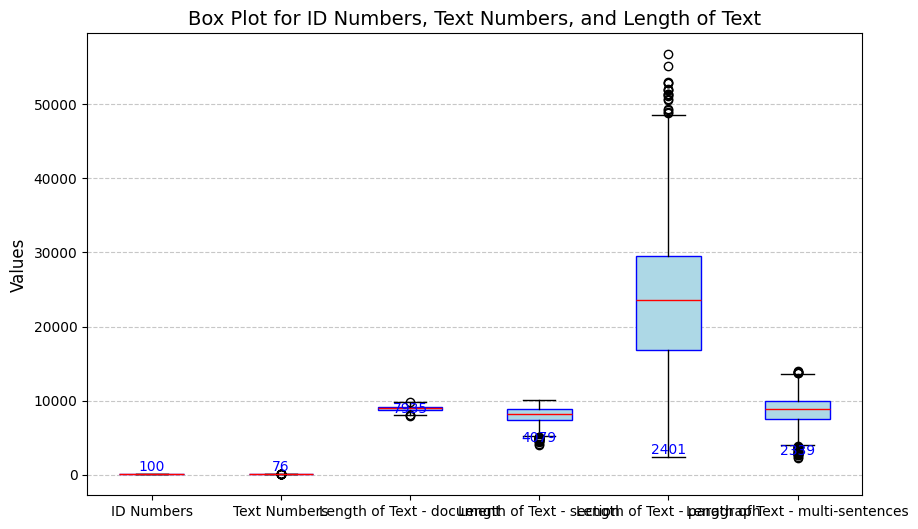

In [14]:
import os
import json
import matplotlib.pyplot as plt
from tqdm import tqdm

id_num = []
text_num = []
length_of_text = {}
file_path = './._cache/gpt-4o-batch-all-target_all-level_0_chroma.jsonl'
file_size = os.path.getsize(file_path)
with open(os.path.abspath(file_path), 'r') as read_file:
    with tqdm(total=file_size, desc=f'Reading {file_path.split(os.path.sep)[-1]}', unit='B', unit_scale=True, unit_divisor=1024) as pbar:
        for line in read_file:
            data = json.loads(line)
            id_set = set()
            text_set = set()
            if isinstance(data['retrieved_nodes'], dict):
                for level in data['retrieved_nodes']:
                    for node in data['retrieved_nodes'][level]:
                        id_set.add(node['id_'])
                        text_set.add(node['text'])
                    
                    length = sum([len(node['text']) for node in data['retrieved_nodes'][level]])
                    if level not in length_of_text:
                        length_of_text[level] = []
                    length_of_text[level].append(length)
                    
            else:
                id_set = set()
                text_set = set()
                for node in data['retrieved_nodes']:
                    id_set.add(node['id_'])
                    text_set.add(node['text'])
                    
            id_num.append(len(id_set))
            text_num.append(len(text_set))
            
            pbar.update(len(line))

data_to_plot = [id_num, text_num] + list(length_of_text.values())
labels = ['ID Numbers', 'Text Numbers'] + [f'Length of Text - {level}' for level in length_of_text.keys()]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=labels, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

min_values = [min(data) for data in data_to_plot]
for i, min_val in enumerate(min_values):
    plt.text(i + 1, min_val, f'{min_val}', color='blue', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Box Plot for ID Numbers, Text Numbers, and Length of Text', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

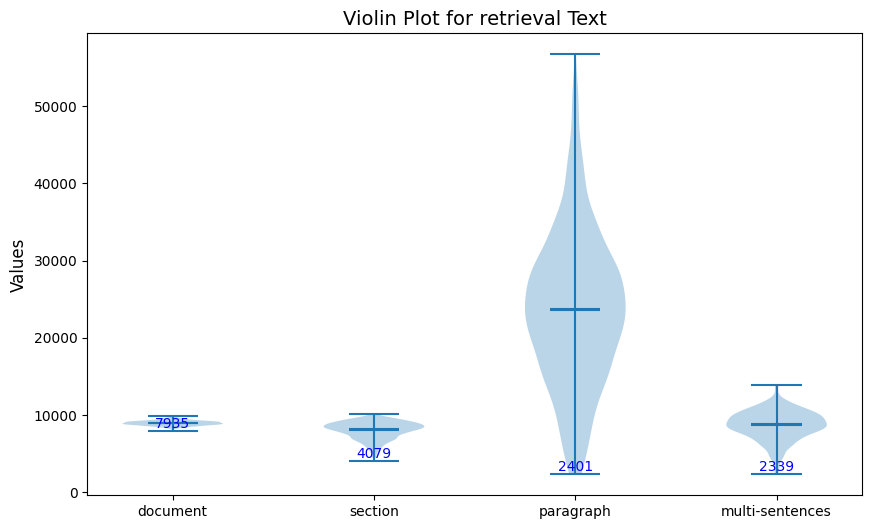

In [20]:
import matplotlib.pyplot as plt

# Data to plot (ID Numbers, Text Numbers, and Length of Text)
# data_to_plot = [[l for l in v if l < 10000] for v in length_of_text.values()]
data_to_plot = list(length_of_text.values())
labels = [level for level in length_of_text.keys()]

# Plot the violin plot
plt.figure(figsize=(10, 6))
plt.violinplot(data_to_plot, showmeans=True, showmedians=True)

min_values = [min(data) for data in data_to_plot]
for i, min_val in enumerate(min_values):
    plt.text(i + 1, min_val, f'{min_val}', color='blue', ha='center', va='bottom', fontsize=10)

# Add labels to the plot
plt.xticks(range(1, len(labels) + 1), labels=labels)
plt.title('Violin Plot for retrieval Text', fontsize=14)
plt.ylabel('Values', fontsize=12)

# Show the plot
plt.show()


In [3]:
length_of_text.index(17320)

221

In [21]:
line_number = 221
with open(file_path, 'r') as file:
    for current_line_number, line in enumerate(file):
        if current_line_number == line_number:
            data = json.loads(line)  # .strip() removes any leading/trailing whitespace or newline
            break

In [24]:
for node in data['retrieved_nodes']['paragraph']:
    print(node['text'])

The study staff monitored subjects throughout the investigation for the occurrence of any adverse side effects.
and were tested under the same conditions as the samples.
The rats were randomly divided into five groups of seven animals each as follows:
The rats were acclimatized for a week, randomized, and divided into eight groups (n = 6).
Analyses were done on two preparations of each of the purified glycodelins to allow assessment of reproducibility.
Figure 7d presents the result of this experiment, in which the red and white  presents the result of this experiment, in which the red and white
Fractions giving same separation pattern on TLC plates were mixed together and forward for further studied.
Results of methylation analysis of WSP from mango fruits.
Equal amounts of sugars were loaded onto the column.
All data were subjected to one-way or two-way ANOVA and Tukey's multiple comparison test using graph pad prism 9. At P<0.05 was considered as difference of significance.
In this s

In [10]:
for level in data['retrieved_nodes']:
    length = sum([len(node['text']) for node in data['retrieved_nodes'][level]])
    print(length)

9167
4372
2793
2775


In [8]:
import os
import json
with open(os.path.abspath('./retrieved_contexts/gpt-4o-batch-all-target_one_retrieved_contexts.jsonl'), 'r') as read_file:
    for i, line in enumerate(read_file):
        if i == 27:
            data = json.loads(line)
            break
len(data['retrieved_nodes_id'][0])

25

In [2]:
id_set = set(data['retrieved_nodes_id'])
text_set = set(data['retrieved_contexts'])

print(len(id_set))
print(len(text_set))

TypeError: unhashable type: 'list'

In [5]:
sum([len(text) for text in data['retrieved_contexts']])

4530

In [12]:
file_path = './._cache/gpt-4o-batch-all-target_all-level_1_chroma_not_finish.jsonl'
file_size = os.path.getsize(file_path)
with open(os.path.abspath(file_path), 'r') as read_file:
    with tqdm(total=file_size, desc=f'Reading {file_path.split(os.path.sep)[-1]}', unit='B', unit_scale=True, unit_divisor=1024) as pbar:
        for i, line in enumerate(read_file):
            data = json.loads(line)
print(i)
print(data['question_node_id'])

Reading gpt-4o-batch-all-target_all-level_1_chroma_not_finish.jsonl:   0%|          | 0.00/5.49G [01:56<?, ?B/s]

290
f6439ca3-ecf0-45a6-ad07-1d8f7e852724


In [1]:
import os
import re
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore

batabase_path = '/home/zhengzheng/scratch0/projects/Fine-Tuned-GPT-2-with-articles-ground-truth-main/code/llamaIndex/database/gpt-4o-batch-all-target'

pattern = "^\d{1,3}_(document|section|paragraph|multi-sentences)_chroma$"
filenames = [filename for filename in os.listdir(batabase_path) if re.search(pattern, filename)]
priority_order = {
    "document": 1,
    "section": 2,
    "paragraph": 3,
    "multi-sentences": 4
}
filenames.sort(key=lambda x: (int(x.split('_')[0]), priority_order[x.split('_')[1]]))
vectors = {}
for filename in filenames:
    db_path = os.path.join(batabase_path, filename)
    chroma_client = chromadb.PersistentClient(path=db_path)
    chroma_collection = chroma_client.get_collection(name='quickstart')
    vectors[db_path] = ChromaVectorStore(chroma_collection=chroma_collection)

In [3]:
db_path = '/home/zhengzheng/scratch0/projects/Fine-Tuned-GPT-2-with-articles-ground-truth-main/code/llamaIndex/database/gpt-4o-batch-all-target/0_document_chroma'
ids = ['3d751495-ce66-4254-a79f-ed8d740b9424']
vectors[db_path].get_nodes(node_ids=ids)

[TextNode(id_='3d751495-ce66-4254-a79f-ed8d740b9424', embedding=None, metadata={'title': 'The outermost cuticle of soybean seeds: chemical composition and function during imbibition', 'authors': "['Suqin Shao', 'Chris J Meyer', 'Fengshan Ma', 'Carol A Peterson', 'Mark A Bernards']", 'sections': "{'abstract': [0, 1286], 'Introduction': [1288, 11537], 'Measurement of water uptake': [11539, 11824], 'Disruption of the outer cuticle of intact stone seeds': [11826, 13097], 'Microscopic analyses': [13099, 15024], 'Surface wax analysis': [15026, 17959], 'Analysis of cutin from outer and inner seed coat cuticles': [17961, 20842], 'Sphingolipid analysis': [20844, 21693], 'Statistical analysis': [21695, 22013], 'Water uptake by soybean seeds': [22015, 22780], 'Making hard seeds soft': [22782, 29583], 'Chemical analyses of soybean seed coat cutin and wax': [29585, 33809], 'Table 1. Chemical analysis of NaOH-treated OX-951 seed coats': [33811, 34242], 'Soxhlet extraction of outer seed coat cuticles

In [ ]:
def check_nonstart_cache_file_with_level(index_dir, save_dir, notIncludeNotFinishCache):
    index_ids = {}
    for filename in os.listdir(os.path.abspath(f'../../database/{index_dir}')):
        match = re.search(r'(\d+)_([\w-]+)_chroma', filename)
        if match:
            if match.group(1) not in index_ids:
                index_ids[match.group(1)] = set()
            index_ids[match.group(1)].add(match.group(2))
    # calculate required ids
    index_ids = sorted(
        (k for k, v in index_ids.items() if len(v) == 4),
        key=lambda x: int(x)
    )
    
    # remove already generated cache id
    for filename in os.listdir(os.path.abspath(save_dir)):
        pattern = index_dir + r'_(\d+)\_chroma.jsonl'
        match = re.search(pattern, filename)
        if match:
            task_id = match.group(1)
            index_ids.remove(task_id)
        if notIncludeNotFinishCache:
            pattern = index_dir+ r'_(\d+)\_chroma_not_finish.jsonl'
            match = re.search(pattern, filename)
            if match:
                task_id = match.group(1)
                index_ids.remove(task_id)
    print(f'leave cache task: {len(index_ids)}')
    return index_ids
    
def check_nonstart_cache_file_without_level(index_dir, save_dir, notIncludeNotFinishCache):
    index_ids = []
    for filename in os.listdir(os.path.abspath(f'../../database/{index_dir}')):
        match = re.search(r'(\d+)\_chroma', filename)
        if match:
            index_ids.append(match.group(1))
    # calculate required ids
    index_ids.sort(key=lambda x: int(x))
    
    # remove already generated cache id
    for filename in os.listdir(os.path.abspath(save_dir)):
        pattern = index_dir + r'_(\d+)\_chroma.jsonl'
        match = re.search(pattern, filename)
        if match:
            task_id = match.group(1)
            index_ids.remove(task_id)
        if notIncludeNotFinishCache:
            pattern = index_dir + r'_(\d+)\_chroma_not_finish.jsonl'
            match = re.search(pattern, filename)
            if match:
                task_id = match.group(1)
                index_ids.remove(task_id)
    print(f'leave cache task: {len(index_ids)}')
    return index_ids